In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time

In [40]:
def getTimes(filename):
    df = pd.read_csv(filename, sep=' ', header=None).values

    times = df[:,-1]
    return times

In [22]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + f"{decimals}" + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [58]:
solvers = ["bb", "brute"]
#solvers = ["bb"]
problems = ["NK4", "NK10", "NK15", "NK20"]
#problems = ["NK30"]

In [55]:
program = "./main"

!mkdir output
for solver in solvers:
    !mkdir "output/{solver}"


for (problem, solver) in itertools.product(problems, solvers):
    print(f"{solver} - {problem}")
    output = open(f"./output/{solver}/{problem}_sol.dat", 'w')

    input = open(f"problems/{problem}_inst.dat", 'r')
    Lines = input.readlines()

    start = time.time()
    
    for index, line in enumerate(Lines, start=0):
        str = program + " " + solver + " " + line.strip()
        #print(str)

        res = !eval "{str}"
        res = res[0]
        
        output.write(f"{res}\n")

        printProgressBar(index + 1, len(Lines))

    end = time.time()
    print(end - start)
    print("")

    output.close()
    input.close()

mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘output/bb’: File exists
bb - NK30
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
337.0114531517029



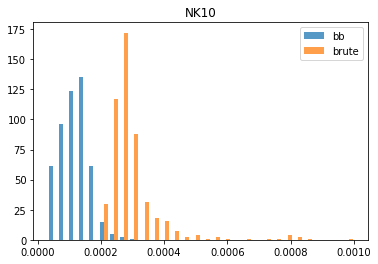

In [60]:
problem = "NK10"

timesbb = getTimes(f"output/bb/{problem}_sol.dat")
timesbrute = getTimes(f"output/brute/{problem}_sol.dat")

to_plot = []
labels = []

to_plot.append(timesbb)
labels.append("bb")

to_plot.append(timesbrute)
labels.append("brute")

fig, ax = plt.subplots(1,1)

ax.hist(to_plot, alpha=0.75, label=labels, bins=30)
ax.set(title=problem)
ax.legend()

plt.show()